In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
df=pd.read_csv('crime.csv')
df= df[df.index < 100000 ]
df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018456255,2018456255540100,5401,0,traffic-accident-hit-and-run,traffic-accident,7/6/2018 4:46:00 PM,NaN,7/6/2018 4:49:00 PM,NaN,3137703.0,1701052.0,-105.010218,39.757174,1.0,113.0,highland,0,1
99996,2019613923,2019613923540100,5401,0,traffic-accident-hit-and-run,traffic-accident,9/24/2019 3:40:00 PM,NaN,9/25/2019 11:15:00 AM,1300 BLOCK N JACKSON ST ...,3156701.0,1694010.0,-104.942802,39.737542,2.0,213.0,congress-park,0,1
99997,2021567160,2021567160540100,5401,0,traffic-accident-hit-and-run,traffic-accident,10/3/2021 2:00:00 AM,NaN,10/3/2021 5:30:00 AM,1400 BLOCK N UINTA ST ...,3170765.0,1694787.0,-104.892776,39.739428,2.0,223.0,east-colfax,0,1
99998,201970504,201970504540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/31/2019 5:09:00 PM,NaN,1/31/2019 5:28:00 PM,2300 BLOCK N FEDERAL BLVD ...,3133553.0,1698903.0,-105.025019,39.751335,1.0,121.0,jefferson-park,0,1


In [112]:
df['OFFENSE_CATEGORY_ID'].unique()

array(['public-disorder', 'drug-alcohol', 'sexual-assault',
       'all-other-crimes', 'traffic-accident', 'robbery',
       'other-crimes-against-persons', 'aggravated-assault', 'arson',
       'burglary', 'larceny', 'theft-from-motor-vehicle', 'auto-theft',
       'white-collar-crime'], dtype=object)

In [113]:
df['OFFENSE_TYPE_ID'].unique()

array(['criminal-mischief-other', 'criminal-mischief-mtr-veh',
       'criminal-mischief-graffiti', 'drug-opium-or-deriv-sell',
       'drug-opium-or-deriv-possess', 'drug-cocaine-sell',
       'drug-poss-paraphernalia', 'drug-marijuana-sell',
       'drug-methampetamine-sell', 'drug-pcs-other-drug',
       'drug-make-sell-other-drug', 'sex-aslt-fondle-adult-victim',
       'liquor-possession', 'police-resisting-arrest',
       'police-false-information', 'police-disobey-lawful-order',
       'police-interference', 'violation-of-restraining-order',
       'violation-of-court-order', 'obstructing-govt-operation',
       'weapon-by-prev-offender-powpo', 'weapon-unlawful-discharge-of',
       'weapon-flourishing', 'weapon-other-viol', 'disturbing-the-peace',
       'traffic-accident-hit-and-run', 'traffic-accident-dui-duid',
       'traffic-accident', 'traf-impound-vehicle',
       'traf-vehicular-assault', 'traf-other', 'vehicular-eluding',
       'vehicular-eluding-no-chase', 'criminal-

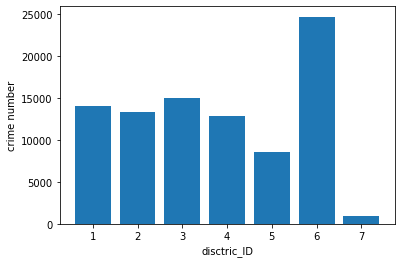

In [114]:
df_temp=df[df['IS_CRIME']==1]
x=df['DISTRICT_ID'].unique()
x=sorted(x)
ylist=[]
a=1
b=1
c=1
d=1
e=1
f=1
g=1
l=1

for l in range(len(df_temp)):
    if df_temp['DISTRICT_ID'].iloc[int(l)]==1.0:
        a=a+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==2.0:
        b=b+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==3.0:
        c=c+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==4.0:
        d=d+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==5.0:
        e=e+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==6.0:
        f=f+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==7.0:
        g=g+1
ylist.append(a)
ylist.append(b)
ylist.append(c)
ylist.append(d)
ylist.append(e)
ylist.append(f)
ylist.append(g)
y=ylist
plt.xlabel('disctric_ID')
plt.ylabel('crime number')
plt.bar(x,y)
plt.show()

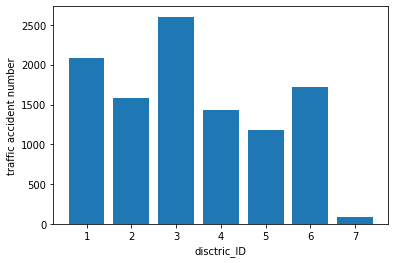

In [115]:
df_temp=df[df['IS_TRAFFIC']==1]
x=df['DISTRICT_ID'].unique()
x=sorted(x)
ylist=[]
a=1
b=1
c=1
d=1
e=1
f=1
g=1
l=1

for l in range(len(df_temp)):
    if df_temp['DISTRICT_ID'].iloc[int(l)]==1.0:
        a=a+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==2.0:
        b=b+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==3.0:
        c=c+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==4.0:
        d=d+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==5.0:
        e=e+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==6.0:
        f=f+1
    if df_temp['DISTRICT_ID'].iloc[int(l)]==7.0:
        g=g+1
ylist.append(a)
ylist.append(b)
ylist.append(c)
ylist.append(d)
ylist.append(e)
ylist.append(f)
ylist.append(g)
y=ylist
plt.xlabel('disctric_ID')
plt.ylabel('traffic accident number')
plt.bar(x,y)
plt.show()

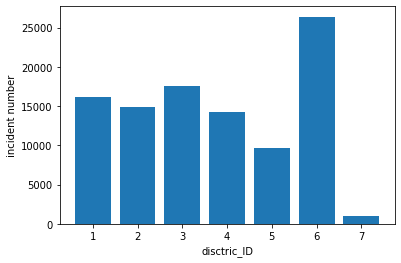

In [116]:
x=df['DISTRICT_ID'].unique()
x=sorted(x)
ylist=[]
a=1
b=1
c=1
d=1
e=1
f=1
g=1
l=1

for l in range(len(df)):
    if df['DISTRICT_ID'].iloc[int(l)]==1.0:
        a=a+1
    if df['DISTRICT_ID'].iloc[int(l)]==2.0:
        b=b+1
    if df['DISTRICT_ID'].iloc[int(l)]==3.0:
        c=c+1
    if df['DISTRICT_ID'].iloc[int(l)]==4.0:
        d=d+1
    if df['DISTRICT_ID'].iloc[int(l)]==5.0:
        e=e+1
    if df['DISTRICT_ID'].iloc[int(l)]==6.0:
        f=f+1
    if df['DISTRICT_ID'].iloc[int(l)]==7.0:
        g=g+1
ylist.append(a)
ylist.append(b)
ylist.append(c)
ylist.append(d)
ylist.append(e)
ylist.append(f)
ylist.append(g)
y=ylist
plt.xlabel('disctric_ID')
plt.ylabel('incident number')
plt.bar(x,y)
plt.show()

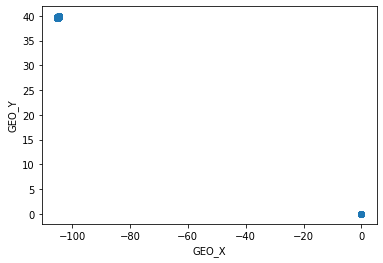

In [117]:
x=df['GEO_LON']
y=df['GEO_LAT']
plt.scatter(x,y)
plt.xlabel('GEO_X')
plt.ylabel('GEO_Y')
plt.show()
#need to add the map image to spot the crime scen

# Map

In [118]:
m = folium.Map(location=[39.7392358,-104.990251])
m

In [119]:
df_temp=df[df['IS_CRIME']==1]
line=0
no_localisation=0
for line in range(0,len(df_temp)-1):
    if pd.isnull(df_temp['GEO_LAT'].loc[int(line)]) or pd.isnull(df_temp['GEO_LON'].loc[int(line)]): #does not work on the rande 145-301 
        #nothing to point
        no_localisation=no_localisation+1
    else:
        folium.Marker(
            [df_temp['GEO_LAT'].loc[line], df_temp['GEO_LON'].loc[line]], popup=df_temp['FIRST_OCCURRENCE_DATE'].loc[line], tooltip=df_temp['OFFENSE_CATEGORY_ID'].loc[line]
            ).add_to(m)

KeyError: 145

In [120]:
df_temp.loc[145]

KeyError: 145

In [ ]:
m